# Motor Parameters #2

In since the Final_probe_test notebook yeilded unsatisfying results, I decided to change the range that hyperopt was using for the motor_transform variable from uniform 0-1 to quniform 0-15, since the origional value for that parameter was 10.

In [19]:
import ctn_benchmark

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, rand
import pickle
import hyperopt

In [20]:
import vision_benchmarks
reload (vision_benchmarks)

<module 'vision_benchmarks' from 'vision_benchmarks.pyc'>

In [ ]:
def objective(x):
    vals = vision_benchmarks.Vision_Model().run(
        motor_feedback = x['motor_feedback'],
        motor_transform = x['motor_transform'],
        finger_feedback = x['finger_feedback'],
        motor_to_fingers_strength = x['motor_to_fingers_strength']
    )
    return {
        'loss': 
            abs(vals['MC_to_finger'] - 0.025) + abs(vals['finger_to_end'] - 0.03) + abs(vals['PMC_to_MC'] - 0.025),
        
        'status': hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
            space = {'motor_feedback': hp.uniform('motor_feedback', 0, 1),
                     'motor_transform': hp.quniform('motor_transform', 0, 15, 1),
                     'finger_feedback': hp.uniform('finger_feedback', 0, 1),
                     'motor_to_fingers_strength': hp.uniform('motor_to_fingers_strength', 0, 1)
                    },
            algo = rand.suggest,
            max_evals = 100,
            trials = trials
           )
pickle.dump({'Trials': trials, 'Best': best}, open ('motor_hyperopt_data_2', 'w'))

In [40]:
best2 = pickle.load(open ('motor_hyperopt_data_2', 'r'))

# motor transform was initially 10 - investigate this
print(best)

{'motor_transform': 2.0, 'motor_to_fingers_strength': 0.8079719992231219, 'finger_feedback': 0.9603352183200515, 'motor_feedback': 0.06848695023305285}


In [41]:
data3 = pickle.load(open('motor_hyperopt_data_2','r'))

In [42]:
import pandas
import seaborn as sns

In [43]:
data3 = ctn_benchmark.Data('data')
df = pandas.DataFrame(data3.data)

In [44]:
df = df[df._AIT_V1_strength == 0.06848695023305285] 
df = df[df._result_feedback == 0.4195086163487056]
df = df[df._motor_transform >= 1]
df

,AIT_to_PFC,MC_to_finger,PFC_to_PMC,PMC_to_MC,V1_to_AIT,_AIT_V1_strength,_AIT_r_transform,_D,_V1_r_transform,__builtins__,...,_gui,_hide_overlay,_motor_feedback,_motor_to_fingers_strength,_motor_transform,_result_feedback,_runtime,_seed,finger_to_end,retina_to_V1
1,0.022,-0.027,0.02,0.057,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.572314,0.745471,2,0.419509,2,1,0.021,0.005
6,0.022,-0.019,0.02,-0.010,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.388029,0.948109,10,0.419509,2,1,0.015,0.005
10,0.022,0.182,0.02,0.056,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.554792,0.311544,2,0.419509,2,1,0.002,0.005
27,0.022,0.005,0.02,-0.012,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.000000,0.400000,10,0.419509,2,1,0.006,0.005
33,0.022,0.010,0.02,-0.010,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.195398,0.327695,10,0.419509,2,1,0.018,0.005
34,0.022,-0.066,0.02,-0.003,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.109556,0.129661,6,0.419509,2,1,0.015,0.005
37,0.022,-0.010,0.02,-0.014,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.260030,0.585221,12,0.419509,2,1,0.007,0.005
51,0.022,0.004,0.02,-0.016,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.384440,0.351208,14,0.419509,2,1,0.005,0.005
56,0.022,-0.083,0.02,0.014,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.087406,0.128144,2,0.419509,2,1,0.015,0.005
57,0.022,-0.065,0.02,-0.004,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.185965,0.039963,8,0.419509,2,1,0.015,0.005


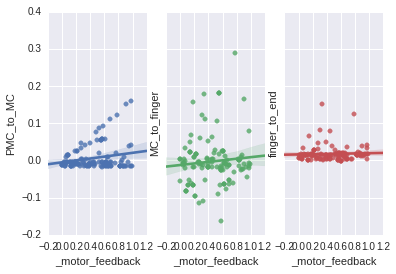

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_motor_feedback'
sns.regplot(x, y = 'PMC_to_MC', ax = ax1, data = df)
sns.regplot(x, y = 'MC_to_finger', ax = ax2, data = df)
sns.regplot(x, y = 'finger_to_end', ax = ax3, data = df)

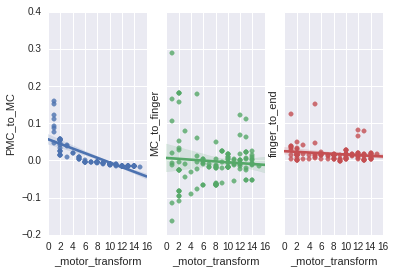

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_motor_transform'
sns.regplot(x, y = 'PMC_to_MC', ax = ax1, data = df)
sns.regplot(x, y = 'MC_to_finger', ax = ax2, data = df)
sns.regplot(x, y = 'finger_to_end', ax = ax3, data = df)

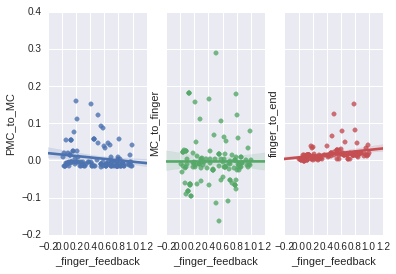

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_finger_feedback'
sns.regplot(x, y = 'PMC_to_MC', ax = ax1, data = df)
sns.regplot(x, y = 'MC_to_finger', ax = ax2, data = df)
sns.regplot(x, y = 'finger_to_end', ax = ax3, data = df)

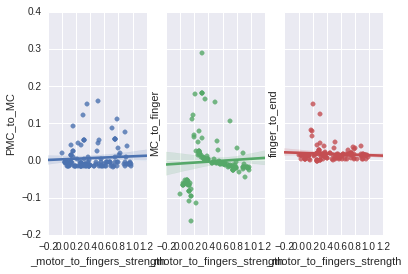

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_motor_to_fingers_strength'
sns.regplot(x, y = 'PMC_to_MC', ax = ax1, data = df)
sns.regplot(x, y = 'MC_to_finger', ax = ax2, data = df)
sns.regplot(x, y = 'finger_to_end', ax = ax3, data = df)